In [5]:
# libraries
import numpy as np
import scipy as sp
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# a와 b의 1차원 매트릭스가 label 되어있을 때, a가 예측이고 b가 true값이라고 할 때, a와 b의 스코어를 매기는 함수이다.
# table count
def table_count(a,b):
    c = []
    ua = list(set(a))
    ub = list(set(b))
    a = np.array(a)
    b = np.array(b)
    for i in range(len(ua)):
        for j in range(len(ub)):
            c.append( sum((a==ua[i])&(b==ub[j])) )
    c = np.array(c)
    c = c.reshape((len(ua),len(ub)))
    return c

In [22]:
# model selection module
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# read data
df = pd.read_csv('/Users/mrfaith/Python3/data01_iris.csv')
data = df.iloc[:,:-1].as_matrix()  #인덱스를 슬라이딩 인풋데이터와 target 데이터를 나눔
target = df['Species'].factorize()[0]

# random split
X_train, X_test, y_train, y_test = train_test_split(
        data, target, test_size=0.4, random_state=0)

# X_train.shape, y_train.shape
# X_test.shape, y_test.shape

#df


In [23]:
# LDA
f = LinearDiscriminantAnalysis()
f.fit(X_train,y_train)
y_train_hat = f.predict(X_train)
table_count(y_train,y_train_hat)
f.score(X_train,y_train)

0.9888888888888889

In [30]:
# leave-one-out 
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
loo.get_n_splits(X_train)

90

In [34]:
scv = []
for train_idx, test_idx in loo.split(X_train):
#     print('Train: ',train_idx,'Test: ',test_idx)
    f.fit(X_train[train_idx,:],y_train[train_idx])
    s = f.score(X_train[test_idx,:],y_train[test_idx])
    scv.append(s)
    
# scv

In [37]:
# K-fold CV
from sklearn.model_selection import KFold
kf = KFold(5)
kf.get_n_splits()
scv = []
for train_idx, test_idx in kf.split(X_train):
#     print('Train: ',train_idx,'Test: ',test_idx)
    f.fit(X_train[train_idx,:],y_train[train_idx])
    s = f.score(X_train[test_idx,:],y_train[test_idx])
    scv.append(s)  

In [40]:
# K-fold CV
from sklearn.model_selection import cross_val_score
f = LinearDiscriminantAnalysis()
s = cross_val_score(f,X_train,y_train,cv=3)
s

array([1.        , 1.        , 0.96551724])

In [43]:
# 데이터 전처리는 설명 패스하고
# practice
df = pd.read_csv('/Users/mrfaith/Python3/data07_iris.csv')
train_idx = np.array(np.arange(0,30).tolist()+np.arange(50,80).tolist())
test_idx = np.array(np.arange(30,50).tolist()+np.arange(80,100).tolist())
xtrain = df.iloc[train_idx,:-1]
ytrain = df.iloc[train_idx,-1]
xtest = df.iloc[test_idx,:-1]
ytest = df.iloc[test_idx,-1]

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
s = np.zeros((40,3))
for n in range(s.shape[0]):
    f = KNeighborsClassifier(n+1) #n : 하이퍼 파라미터, 주위 가까운 n 개
    f.fit(xtrain,ytrain)
    s[n,0] = f.score(xtrain,ytrain)
    s[n,1] = cross_val_score(f,xtrain,ytrain,cv=5).mean()
    s[n,2] = f.score(xtest,ytest)
    
# s

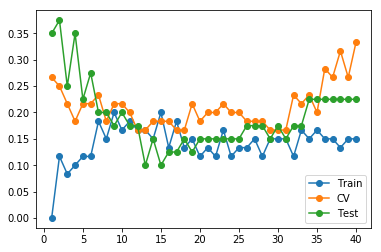

In [49]:
plt.plot(np.arange(1,41),1-s,marker='o')
plt.legend(('Train','CV','Test'))
plt.show()
# 가장 높은 값을 고려했을 때, CV를 따져서 하면 더 test에 근접한 값으로 .. 수 있다
